# Classification for Choropleth Mapping

- Level: Novice
- Duration: 2 hours
- Contributors: Serge Rey (srey@asu.edu); Jon Reades (jonathan.reades@kcl.ac.uk)
- Keywords: choropleth; mapping; visualization; pysal; classifiers

## Introduction

* what is classification
* role in choropleth mapping
* explore classification using PySAL

In [1]:
import pysal as ps

## Data Set: Mexico State Gross Domestic Product

In [2]:
ps.examples.available()

['stl',
 'sids2',
 'snow_maps',
 'south',
 'baltim',
 'wmat',
 'arcgis',
 'book',
 '10740',
 'virginia',
 'sacramento2',
 'calemp',
 'chicago',
 'burkitt',
 'geodanet',
 'columbus',
 'desmith',
 'Polygon_Holes',
 'street_net_pts',
 'nat',
 'juvenile',
 'mexico',
 'networks',
 'Polygon',
 'taz',
 'nyc_bikes',
 'us_income',
 'Line',
 'Point',
 'newHaven']

In [3]:
ps.examples.explain('mexico')

{'description': 'Mexican states regional income 1940-2000',
 'explanation': ['Data used in   Rey, S.J. and M.L.  Sastre Gutierrez. (2010) "Interregional inequality',
  'dynamics in Mexico." Spatial Economic Analysis, 5: 277-298',
  '* mexico.csv: attribute data',
  '* mexico.gal: spatial weights in GAL format',
  'Polygon data, n=32, k=13'],
 'name': 'mexico'}

In [4]:
f = ps.open(ps.examples.get_path('mexico.csv'))
f.header

['State',
 'pcgdp1940',
 'pcgdp1950',
 'pcgdp1960',
 'pcgdp1970',
 'pcgdp1980',
 'pcgdp1990',
 'pcgdp2000',
 'hanson03',
 'hanson98',
 'esquivel99',
 'inegi',
 'inegi2']

In [5]:
y = f.by_col_array('pcgdp2000')

In [6]:
y

array([[ 27782.],
       [ 29855.],
       [ 26103.],
       [ 36163.],
       [  8684.],
       [ 30735.],
       [ 28460.],
       [ 21358.],
       [ 54349.],
       [ 17379.],
       [ 15585.],
       [ 11820.],
       [ 12348.],
       [ 21610.],
       [ 16322.],
       [ 11838.],
       [ 18170.],
       [ 11478.],
       [ 38672.],
       [  9010.],
       [ 15685.],
       [ 26149.],
       [ 33442.],
       [ 15866.],
       [ 15242.],
       [ 24068.],
       [ 13360.],
       [ 23546.],
       [ 11701.],
       [ 12191.],
       [ 17509.],
       [ 11130.]])

### Numerical summaries

#### Sample Mean

$\bar{y} = \sum_{i=1}^n y_i$

In [7]:
y_mean = y.mean()
y_mean

20862.8125

#### Sample Standard Deviation

$\hat{\sigma} = \sqrt{\frac{\sum_{i=1}^n (y_i-\bar{y})^2}{n-1}}$

In [8]:
y_std = y.std()
y_std

10114.446813338027

#### Median

In [9]:
import numpy as np
y_median = np.median(y)
y_median

17444.0

In [10]:
(y < y_mean).sum()

18

In [11]:
(y > y_mean).sum()

14

In [12]:
y_sorted = np.sort(y, axis=0)
y_sorted

array([[  8684.],
       [  9010.],
       [ 11130.],
       [ 11478.],
       [ 11701.],
       [ 11820.],
       [ 11838.],
       [ 12191.],
       [ 12348.],
       [ 13360.],
       [ 15242.],
       [ 15585.],
       [ 15685.],
       [ 15866.],
       [ 16322.],
       [ 17379.],
       [ 17509.],
       [ 18170.],
       [ 21358.],
       [ 21610.],
       [ 23546.],
       [ 24068.],
       [ 26103.],
       [ 26149.],
       [ 27782.],
       [ 28460.],
       [ 29855.],
       [ 30735.],
       [ 33442.],
       [ 36163.],
       [ 38672.],
       [ 54349.]])

In [13]:
y_sorted[15]

array([ 17379.])

In [14]:
y_sorted[16]

array([ 17509.])

In [15]:
(y_sorted[15]+y_sorted[16])/2.

array([ 17444.])

### Univariate Distribution Visualization

Populating the interactive namespace from numpy and matplotlib


/home/serge/anaconda2/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


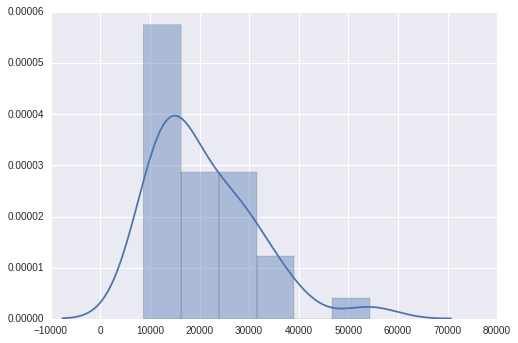

In [16]:
%pylab inline
import seaborn as sns
sns.distplot(y)

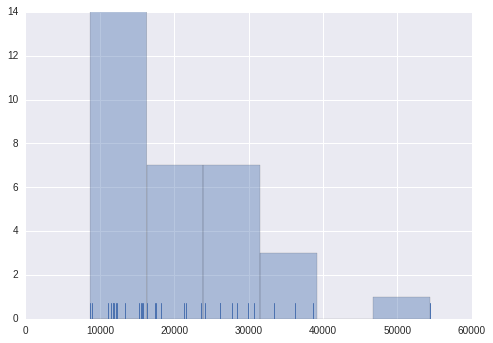

In [17]:
sns.distplot(y, kde=False, rug=True)

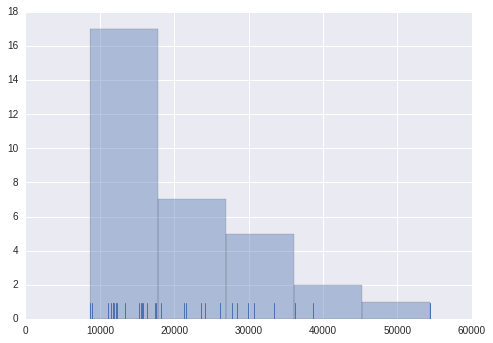

In [18]:
sns.distplot(y, bins=5, kde=False, rug=True)

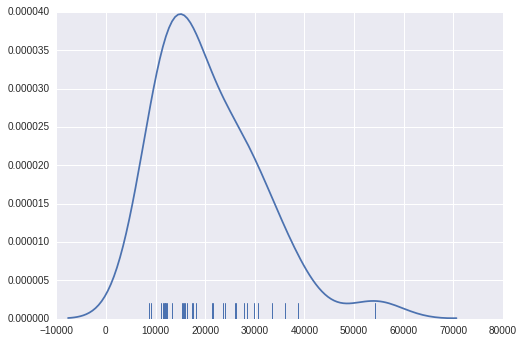

In [19]:
sns.distplot(y, hist=False,  rug=True)

## PySAL Classifiers

### Quantiles

In [20]:
q5 = ps.Quantiles(y)

In [21]:
q5

                  Quantiles                  
 
  Lower              Upper              Count
            x[i] <= 11908.600               7
11908.600 < x[i] <= 15757.400               6
15757.400 < x[i] <= 21509.200               6
21509.200 < x[i] <= 28324.400               6
28324.400 < x[i] <= 54349.000               7

In [22]:
dir(q5)

['__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__doc__',
 '__format__',
 '__getattribute__',
 '__hash__',
 '__init__',
 '__module__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_classify',
 '_set_bins',
 '_summary',
 '_table_string',
 '_update',
 'adcm',
 'bins',
 'classes',
 'counts',
 'find_bin',
 'gadf',
 'get_adcm',
 'get_gadf',
 'get_tss',
 'k',
 'make',
 'name',
 'tss',
 'update',
 'y',
 'yb']

In [23]:
q5.yb

array([3, 4, 3, 4, 0, 4, 4, 2, 4, 2, 1, 0, 1, 3, 2, 0, 2, 0, 4, 0, 1, 3, 4,
       2, 1, 3, 1, 3, 0, 1, 2, 0])

In [24]:
q5.adcm

73562.0

In [25]:
q4 = ps.Quantiles(y, k=4)
q4

                  Quantiles                  
 
  Lower              Upper              Count
            x[i] <= 12308.750               8
12308.750 < x[i] <= 17444.000               8
17444.000 < x[i] <= 26557.250               8
26557.250 < x[i] <= 54349.000               8

### Equal Interval

In [26]:
ei = ps.Equal_Interval(y, k=5)
ei

                Equal Interval                
 
  Lower              Upper               Count
            x[i] <= 17817.000               17
17817.000 < x[i] <= 26950.000                7
26950.000 < x[i] <= 36083.000                5
36083.000 < x[i] <= 45216.000                2
45216.000 < x[i] <= 54349.000                1

### Maximum Breaks

In [27]:
mb = ps.Maximum_Breaks(y, k=5)
mb

                Maximum_Breaks                
 
  Lower              Upper               Count
            x[i] <= 19764.000               18
19764.000 < x[i] <= 32088.500               10
32088.500 < x[i] <= 34802.500                1
34802.500 < x[i] <= 46510.500                2
46510.500 < x[i] <= 54349.000                1

### Box Plot

In [28]:
bp = ps.Box_Plot(y)
bp

                   Box Plot                  
 
  Lower              Upper              Count
            x[i] <= -9064.000               0
-9064.000 < x[i] <= 12308.750               8
12308.750 < x[i] <= 17444.000               8
17444.000 < x[i] <= 26557.250               8
26557.250 < x[i] <= 47930.000               7
47930.000 < x[i] <= 54349.000               1

### Standard Deviation

In [29]:
sd = ps.Std_Mean(y)
sd

                   Std_Mean                   
 
  Lower              Upper               Count
            x[i] <=   310.236                0
  310.236 < x[i] <= 10586.524                2
10586.524 < x[i] <= 31139.101               26
31139.101 < x[i] <= 41415.389                3
41415.389 < x[i] <= 54349.000                1

### Head Tail

In [30]:
ht = ps.esda.mapclassify.HeadTail_Breaks(y) # need to change import structure
ht

               HeadTail_Breaks                
 
  Lower              Upper               Count
            x[i] <= 20862.812               18
20862.812 < x[i] <= 30163.714                9
30163.714 < x[i] <= 38672.200                4
38672.200 < x[i] <= 54349.000                1

### Jenks Caspall

In [31]:
import numpy as np
np.random.seed(12345)
jc = ps.Jenks_Caspall(y)
jc

                Jenks_Caspall                 
 
  Lower              Upper               Count
            x[i] <= 13360.000               10
13360.000 < x[i] <= 16322.000                5
16322.000 < x[i] <= 21610.000                5
21610.000 < x[i] <= 30735.000                8
30735.000 < x[i] <= 54349.000                4

In [32]:
jcf = ps.Jenks_Caspall_Forced(y)
jcf

             Jenks_Caspall_Forced            
 
  Lower              Upper              Count
            x[i] <= 11838.000               7
11838.000 < x[i] <= 15685.000               6
15685.000 < x[i] <= 21358.000               6
21358.000 < x[i] <= 29855.000               8
29855.000 < x[i] <= 54349.000               5

### Fisher Jenks

In [33]:
fj = ps.Fisher_Jenks(y, k=5)
fj

                 Fisher_Jenks                 
 
  Lower              Upper               Count
            x[i] <= 13360.000               10
13360.000 < x[i] <= 21610.000               10
21610.000 < x[i] <= 30735.000                8
30735.000 < x[i] <= 38672.000                3
38672.000 < x[i] <= 54349.000                1

### max-p

In [34]:
mp = ps.esda.mapclassify.Max_P_Classifier(y, k=5)
mp

                    Max_P                    
 
  Lower              Upper              Count
            x[i] <= 12348.000               9
12348.000 < x[i] <= 18170.000               9
18170.000 < x[i] <= 21358.000               1
21358.000 < x[i] <= 28460.000               7
28460.000 < x[i] <= 54349.000               6

### Fit

In [35]:
mp.adcm

65722.0

In [36]:
fj.adcm

49076.0

In [37]:
q5.adcm

73562.0

In [38]:
jcf.adcm

68381.0

In [39]:
mb.adcm

73723.0

In [40]:
q4.adcm

82978.0

In [41]:
res = [mp, fj, q5, jcf, mb, sd, bp, ht]

In [42]:
adcms = [m.adcm for m in res]

In [43]:
adcms

[65722.0, 49076.0, 73562.0, 68381.0, 73723.0, 143714.0, 37184.0, 77240.0]

In [44]:
bp.k

4

In [45]:
mp.k

5

## Consensus classification

In [46]:
ybs = np.array([m.yb for m in res])
ybs.T

array([[3, 2, 3, 3, 1, 2, 4, 1],
       [4, 2, 4, 3, 1, 2, 4, 1],
       [3, 2, 3, 3, 1, 2, 3, 1],
       [4, 3, 4, 4, 3, 3, 4, 2],
       [0, 0, 0, 0, 0, 1, 1, 0],
       [4, 2, 4, 4, 1, 2, 4, 2],
       [3, 2, 4, 3, 1, 2, 4, 1],
       [2, 1, 2, 2, 1, 2, 3, 1],
       [4, 4, 4, 4, 4, 4, 5, 3],
       [1, 1, 2, 2, 0, 2, 2, 0],
       [1, 1, 1, 1, 0, 2, 2, 0],
       [0, 0, 0, 0, 0, 2, 1, 0],
       [0, 0, 1, 1, 0, 2, 2, 0],
       [3, 1, 3, 3, 1, 2, 3, 1],
       [1, 1, 2, 2, 0, 2, 2, 0],
       [0, 0, 0, 0, 0, 2, 1, 0],
       [1, 1, 2, 2, 0, 2, 3, 0],
       [0, 0, 0, 0, 0, 2, 1, 0],
       [4, 3, 4, 4, 3, 3, 4, 2],
       [0, 0, 0, 0, 0, 1, 1, 0],
       [1, 1, 1, 1, 0, 2, 2, 0],
       [3, 2, 3, 3, 1, 2, 3, 1],
       [4, 3, 4, 4, 2, 3, 4, 2],
       [1, 1, 2, 2, 0, 2, 2, 0],
       [1, 1, 1, 1, 0, 2, 2, 0],
       [3, 2, 3, 3, 1, 2, 3, 1],
       [1, 0, 1, 1, 0, 2, 2, 0],
       [3, 2, 3, 3, 1, 2, 3, 1],
       [0, 0, 0, 0, 0, 2, 1, 0],
       [0, 0, 1, 1, 0, 2, 1, 0],
       [1,

In [47]:
from sklearn.cluster import KMeans 

In [48]:
km = KMeans(n_clusters=5)

In [49]:
km.fit(ybs.T)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=5, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [50]:
km.labels_

array([1, 1, 1, 2, 4, 1, 1, 3, 2, 3, 0, 4, 0, 1, 3, 4, 3, 4, 2, 4, 0, 1, 2,
       3, 0, 1, 0, 1, 4, 0, 3, 4], dtype=int32)

In [51]:
y

array([[ 27782.],
       [ 29855.],
       [ 26103.],
       [ 36163.],
       [  8684.],
       [ 30735.],
       [ 28460.],
       [ 21358.],
       [ 54349.],
       [ 17379.],
       [ 15585.],
       [ 11820.],
       [ 12348.],
       [ 21610.],
       [ 16322.],
       [ 11838.],
       [ 18170.],
       [ 11478.],
       [ 38672.],
       [  9010.],
       [ 15685.],
       [ 26149.],
       [ 33442.],
       [ 15866.],
       [ 15242.],
       [ 24068.],
       [ 13360.],
       [ 23546.],
       [ 11701.],
       [ 12191.],
       [ 17509.],
       [ 11130.]])

In [52]:
y[km.labels_==4]

array([[  8684.],
       [ 11820.],
       [ 11838.],
       [ 11478.],
       [  9010.],
       [ 11701.],
       [ 11130.]])

In [53]:
cc = []
for c in range(5):
    cl = km.labels_==c
    yc = y[cl]
    print(yc)
    print(yc.min(), yc.max())
    cc.append(yc.max())
    

[[ 15585.]
 [ 12348.]
 [ 15685.]
 [ 15242.]
 [ 13360.]
 [ 12191.]]
(12191.0, 15685.0)
[[ 27782.]
 [ 29855.]
 [ 26103.]
 [ 30735.]
 [ 28460.]
 [ 21610.]
 [ 26149.]
 [ 24068.]
 [ 23546.]]
(21610.0, 30735.0)
[[ 36163.]
 [ 54349.]
 [ 38672.]
 [ 33442.]]
(33442.0, 54349.0)
[[ 21358.]
 [ 17379.]
 [ 16322.]
 [ 18170.]
 [ 15866.]
 [ 17509.]]
(15866.0, 21358.0)
[[  8684.]
 [ 11820.]
 [ 11838.]
 [ 11478.]
 [  9010.]
 [ 11701.]
 [ 11130.]]
(8684.0, 11838.0)


In [54]:
cc.sort()
cc

[11838.0, 15685.0, 21358.0, 30735.0, 54349.0]

In [55]:
uc = ps.User_Defined(y, bins=cc)
uc

                 User Defined                
 
  Lower              Upper              Count
            x[i] <= 11838.000               7
11838.000 < x[i] <= 15685.000               6
15685.000 < x[i] <= 21358.000               6
21358.000 < x[i] <= 30735.000               9
30735.000 < x[i] <= 54349.000               4

In [56]:
uc.adcm

67539.0

In [57]:
fj.adcm

49076.0

In [58]:
q5.adcm

73562.0

In [59]:
from scipy.cluster.hierarchy import dendrogram, linkage

Hiearchical clustering using [Ward's method](http://sites.stat.psu.edu/~ajw13/stat505/fa06/19_cluster/09_cluster_wards.html).

In [60]:
Z = linkage(ybs.T, 'ward')

In [61]:
Z

array([[  2.        ,  21.        ,   0.        ,   2.        ],
       [  3.        ,  18.        ,   0.        ,   2.        ],
       [  4.        ,  19.        ,   0.        ,   2.        ],
       [  9.        ,  14.        ,   0.        ,   2.        ],
       [ 10.        ,  20.        ,   0.        ,   2.        ],
       [ 11.        ,  15.        ,   0.        ,   2.        ],
       [ 23.        ,  35.        ,   0.        ,   3.        ],
       [ 17.        ,  37.        ,   0.        ,   3.        ],
       [ 16.        ,  30.        ,   0.        ,   2.        ],
       [ 28.        ,  39.        ,   0.        ,   4.        ],
       [ 24.        ,  36.        ,   0.        ,   3.        ],
       [ 25.        ,  32.        ,   0.        ,   3.        ],
       [ 27.        ,  43.        ,   0.        ,   4.        ],
       [ 31.        ,  41.        ,   0.        ,   5.        ],
       [  0.        ,   6.        ,   1.        ,   2.        ],
       [ 12.        ,  26

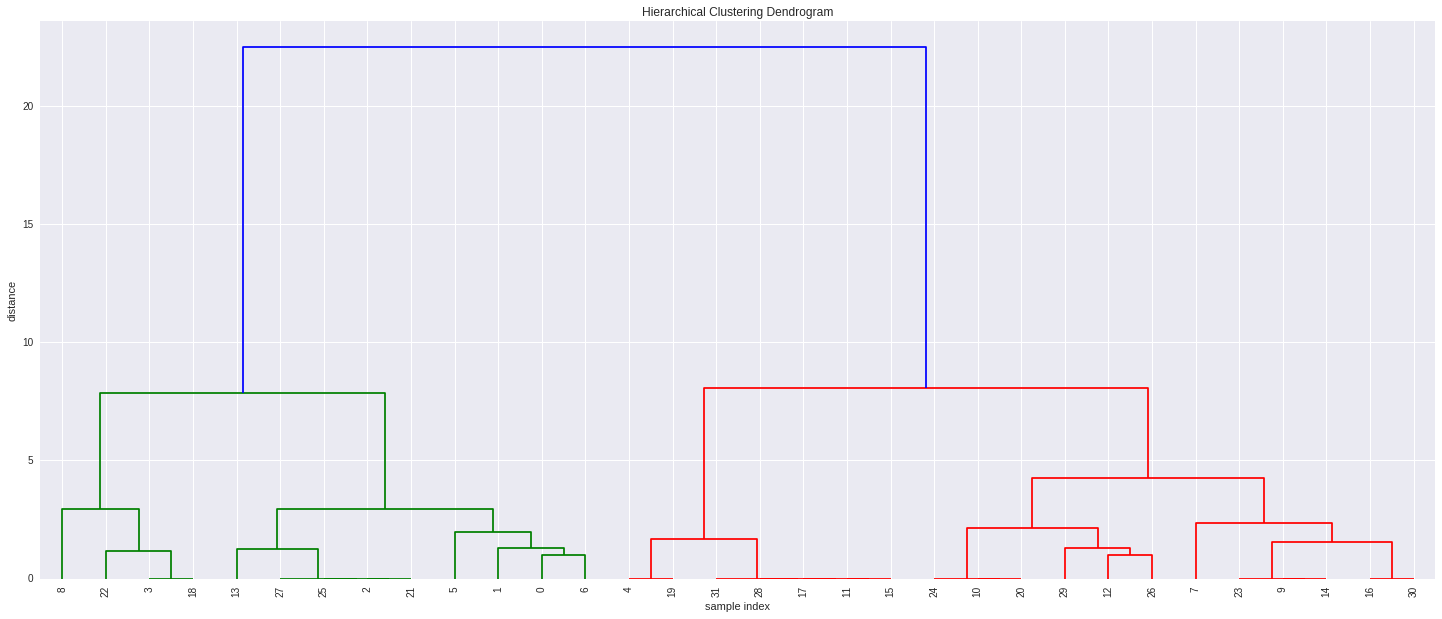

In [62]:
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=10.,  # font size for the x axis labels
)
plt.show()


In [63]:
Z

array([[  2.        ,  21.        ,   0.        ,   2.        ],
       [  3.        ,  18.        ,   0.        ,   2.        ],
       [  4.        ,  19.        ,   0.        ,   2.        ],
       [  9.        ,  14.        ,   0.        ,   2.        ],
       [ 10.        ,  20.        ,   0.        ,   2.        ],
       [ 11.        ,  15.        ,   0.        ,   2.        ],
       [ 23.        ,  35.        ,   0.        ,   3.        ],
       [ 17.        ,  37.        ,   0.        ,   3.        ],
       [ 16.        ,  30.        ,   0.        ,   2.        ],
       [ 28.        ,  39.        ,   0.        ,   4.        ],
       [ 24.        ,  36.        ,   0.        ,   3.        ],
       [ 25.        ,  32.        ,   0.        ,   3.        ],
       [ 27.        ,  43.        ,   0.        ,   4.        ],
       [ 31.        ,  41.        ,   0.        ,   5.        ],
       [  0.        ,   6.        ,   1.        ,   2.        ],
       [ 12.        ,  26

In [64]:
ybs.T[[2,21]]

array([[3, 2, 3, 3, 1, 2, 3, 1],
       [3, 2, 3, 3, 1, 2, 3, 1]])

In [65]:
y[[2, 21]]

array([[ 26103.],
       [ 26149.]])

In [66]:
ybs.T[[3, 18]]

array([[4, 3, 4, 4, 3, 3, 4, 2],
       [4, 3, 4, 4, 3, 3, 4, 2]])

In [67]:
y[[3, 18]]

array([[ 36163.],
       [ 38672.]])

Looking at our z matrix, the first time we see an index (idx) larger than len(y) is in step 7 (idx=6 since Python is 0 offset).



In [68]:
Z[6]

array([ 23.,  35.,   0.,   3.])

Here we have singleton 23 being merged with cluster index 35. But we only have n=32 states. The question is what cluster is 23 being joined to in this step?

All indices idx > len(X) indicate point to a cluster formered at step idx - len(x).

So:


In [69]:
Z[35 - 32]

array([  9.,  14.,   0.,   2.])

means that in step 6, the algorithm joins singleton 23 to the cluster  with id 35 composed of (9, 14). Cluster 35 formed in step idx-len(y)=  35-2 = 3.

The new cluster has size 3 and is defined as (9, 14, 23).

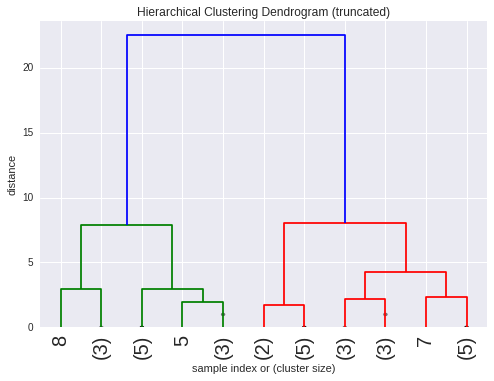

In [70]:
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=11,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=20.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

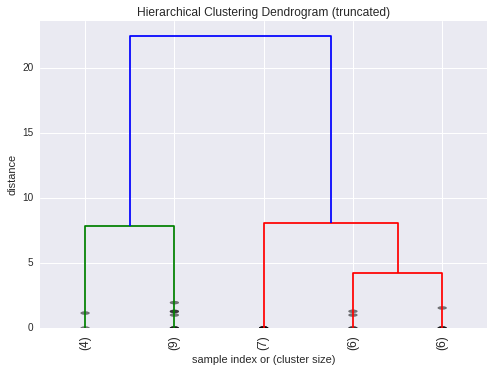

In [71]:
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=5,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

In [72]:
from scipy.cluster.hierarchy import fcluster
fcluster(Z, 5, criterion='maxclust')

array([2, 2, 2, 1, 3, 2, 2, 5, 1, 5, 4, 3, 4, 2, 5, 3, 5, 3, 1, 3, 4, 2, 1,
       5, 4, 2, 4, 2, 3, 4, 5, 3], dtype=int32)

In [73]:
from scipy.cluster.hierarchy import fcluster
fcluster(Z, 2, criterion='maxclust')

array([1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 1,
       2, 2, 1, 2, 1, 2, 2, 2, 2], dtype=int32)

In [74]:
from scipy.cluster.hierarchy import fcluster
fcluster(Z, 7, criterion='maxclust')

array([4, 4, 3, 1, 5, 4, 4, 7, 2, 7, 6, 5, 6, 3, 7, 5, 7, 5, 1, 5, 6, 3, 1,
       7, 6, 3, 6, 3, 5, 6, 7, 5], dtype=int32)